# Import necessary libraries

In [3]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# libaries to help with data visualization
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
# Library to split data
from sklearn.model_selection import train_test_split
# library to import to standardize the data
from sklearn.preprocessing import MinMaxScaler
#To import different metrics
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error, make_scorer
#Importing classback API
from keras import callbacks
# Importing tensorflow library
import tensorflow as tf
# importing different functions to build models
from tensorflow.keras.layers import Dense, Dropout,InputLayer
from tensorflow.keras.models import Sequential
# Importing Batch Normalization
from keras.layers import BatchNormalization
# Importing backend
from tensorflow.keras import backend
# Importing shffule
import random
from random import shuffle
from keras.callbacks import ModelCheckpoint
# Importing optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from  tensorflow.keras.optimizers import SGD

#Gridsearch for hyperparameter optimization
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.neural_network import MLPRegressor
import scikeras
from scikeras.wrappers import KerasRegressor

#Import Shap
import shap

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


# Load data

In [4]:
All = pd.ExcelFile('allData.xls')
data = pd.read_excel(All, 'Data')
data

,Number,Data source,Selected,Mix number in literature,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),...,Annual average temperature of exposed environment (Celsius degree),Annual wetting times/rainy days of exposed environment (d),Annual average precipitation of exposed environment (mm),Slump (mm),Average 28-day compressive strength (Mpa),Average 28-day split strength (Mpa),Chloride diffusion coefficient (10-12 m2/s),Average carbonation coefficient (mm/year^0.5),Specimen size,Note
0,NaN,2. Yunusa 2014,NaN,PC-40,0.0,0.0,450.0,0.0,0.0,0.0,...,24.3,0.0,0.0,30.0,75.93,NaN,NaN,3.139,NaN,No significant effect of initial water curing ...
1,NaN,2. Yunusa 2014,NaN,PC-50,0.0,0.0,400.0,0.0,0.0,0.0,...,24.3,0.0,0.0,60.0,64.50,NaN,NaN,4.022,NaN,NaN
2,NaN,2. Yunusa 2014,NaN,PC-60,0.0,0.0,350.0,0.0,0.0,0.0,...,24.3,0.0,0.0,100.0,49.23,NaN,NaN,6.670,NaN,NaN
3,NaN,2. Yunusa 2014,NaN,PC-75,0.0,0.0,300.0,0.0,0.0,0.0,...,24.3,0.0,0.0,140.0,36.00,NaN,NaN,7.945,NaN,NaN
4,NaN,2. Yunusa 2014,NaN,FA-40,0.0,0.0,315.0,0.0,135.0,0.0,...,24.3,0.0,0.0,40.0,62.80,NaN,NaN,6.052,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,NaN,"J48. Farahani, 2015",NaN,W3-4,350.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.550,NaN,150*150*150,NaN
1984,NaN,"J48. Farahani, 2015",NaN,W4-1,380.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.375,NaN,150*150*150,NaN
1985,NaN,"J48. Farahani, 2015",NaN,W4-2,370.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000,NaN,150*150*150,NaN
1986,NaN,"J48. Farahani, 2015",NaN,W4-3,360.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.500,NaN,150*150*150,NaN


In [5]:
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 22 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   ASTM type 1 ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 1   CEM I 42.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 2   CEM I 52.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 3   Class C Fly ash content (kg/m^3)                       1988 non-null   float64
 4   Class F Fly ash content (kg/m^3)                       1988 non-null   float64
 5   Slag content (kg/m^3)                                  1988 non-null   float64
 6   Silica fume content (kg/m^3)                           1988 non-null   float64
 7   Water content (kg/m^3)                                 1988 non-null   float64
 8   Superplasticizer content (kg/m^3)               

In [ ]:
Excess_col_indices = list(range(0, 4)) + list(range(20, 27)) + [33]
semi_df = data.iloc[:, [col for col in range(data.shape[1]) if col not in Excess_col_indices]]
semi_df.info()

# Feature Engineering

## Compressive strength

In [6]:
# function to plot a boxplot and a histogram along the same scale.

def hist_boxplot(data, feature, figsize = (12,7),kde = True, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,
        sharex= True,
        gridspec_kw ={'height_ratios': (0.25,0.75)},
        figsize = figsize)
    sns.boxplot(data=data, x =feature, ax = ax_box2, showmeans = True, color = 'violet')

    if bins:
        sns.histplot(data=data, x =feature, kde = kde, ax = ax_hist2, bins=bins, palette = 'winter')

    else:
        sns.histplot(data=data, x =feature, kde = kde, ax = ax_hist2, palette = 'winter')
    ax_hist2.axvline(data[feature].mean(), color = 'green', linestyle = "--")
    ax_hist2.axvline(data[feature].median(), color = 'black', linestyle = "-")

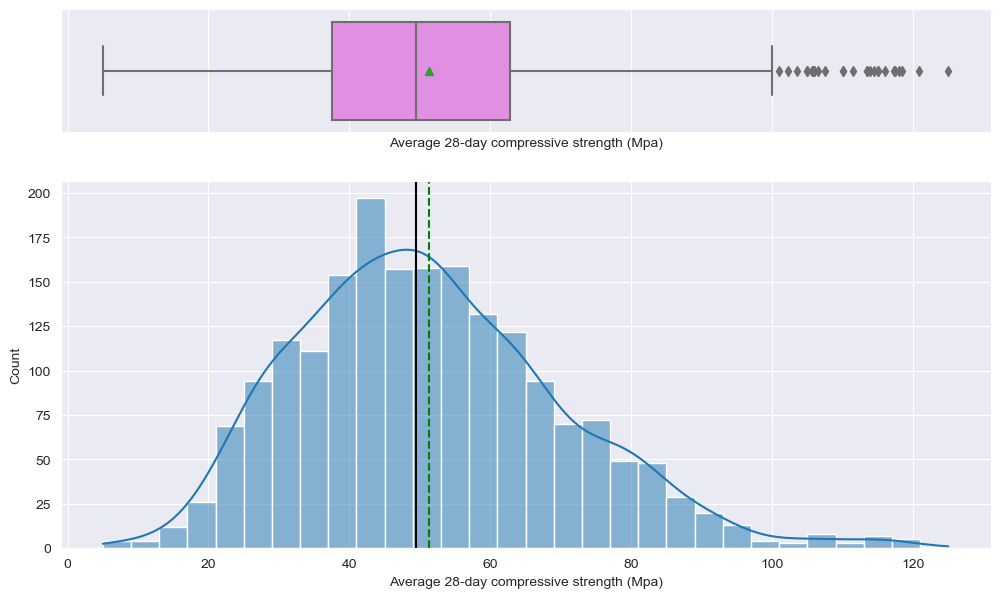

In [7]:
# Quick fix 

filtered_row = semi_df[semi_df['Average 28-day compressive strength (Mpa)'] > 400]

if len(filtered_row) == 1:
    value_to_divide = filtered_row['Average 28-day compressive strength (Mpa)'].values[0]
    updated_value = value_to_divide / 10

    # Update the value in the DataFrame
    semi_df.loc[semi_df['Average 28-day compressive strength (Mpa)'] > 400, 'Average 28-day compressive strength (Mpa)'] = updated_value
else:
    print("No rows or multiple rows matching the condition.")

hist_boxplot(semi_df, 'Average 28-day compressive strength (Mpa)')

### Conversion factor

In [8]:
# Follow the same conversion factor from Compressive strength.ipynb
conversion_factors = {
    '150*150*150': 1.0,
    '200h*100r': {
        (15, 44): 1.21,
        (45, 54): 1.17,
        (55, 64): 1.12,
        (65, 74): 1.10,
        (75, 84): 1.08,
        (85, 94): 1.06,
        (95, 104): 1.04,  # Guess, out of range
        (105, 114): 1.02,
    },
    '100*100*100': 0.95,
    '100*100*300': {},  # No suitable conversion index available
    '300h*150r': {
        (15, 44): 1.32,
        (45, 54): 1.32,
        (55, 64): 1.28,
        (65, 74): 1.25,
        (75, 84): 1.22,
        (85, 94): 1.19,
        (95, 104): 1.16,
        (105, 114): 1.13,
    },
    '100h*100r': {},  # No suitable conversion index available
}


def convert_strength(row):
    size = row['Specimen size']
    strength = row['Average 28-day compressive strength (Mpa)']

    original_size = size  # Store the original size

    if size in conversion_factors:
        factor = conversion_factors[size]

        if isinstance(factor, dict):
            for range_, conversion_factor in factor.items():
                lower_bound, upper_bound = range_
                if lower_bound <= strength < upper_bound:
                    return strength * conversion_factor
        else:
            return strength * factor

    return strength


# Apply the conversion function to the DataFrame
semi_df['Converted Strength'] = semi_df.apply(convert_strength, axis=1)

# Print the updated DataFrame
print(semi_df)

      ASTM type 1 ordinary Portland Cement content (kg/m^3)  \
0                                                   0.0       
1                                                   0.0       
2                                                   0.0       
3                                                   0.0       
4                                                   0.0       
...                                                 ...       
1983                                              350.0       
1984                                              380.0       
1985                                              370.0       
1986                                              360.0       
1987                                              350.0       

      CEM I 42.5N ordinary Portland Cement content (kg/m^3)  \
0                                                   0.0       
1                                                   0.0       
2                                                   0.

In [9]:
semi_df['Converted Strength']

0       75.93
1       64.50
2       49.23
3       36.00
4       62.80
        ...  
1983      NaN
1984      NaN
1985      NaN
1986      NaN
1987      NaN
Name: Converted Strength, Length: 1988, dtype: float64

## Curing method

In [10]:
num_df = semi_df.select_dtypes(include=np.number)
obj_df = semi_df.select_dtypes(include=['object'])

In [11]:
for col in obj_df.columns:
    value_counts = obj_df[col].value_counts()
    print(f"Column '{col}':")
    print(value_counts)
    print()

Column 'Curing method':
Submerged    837
Moist        503
Sealed       456
Air          184
Name: Curing method, dtype: int64

Column 'Specimen size':
150*150*150    461
200h*100r      215
100*100*100    158
100*100*300     22
300h*150r       12
100h*100r        5
Name: Specimen size, dtype: int64


In [12]:
semi_df['Curing method'].isnull().sum()

8

In [13]:
missing = semi_df['Curing method'].isnull()
semi_df[missing]

,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),Silica fume content (kg/m^3),Water content (kg/m^3),Superplasticizer content (kg/m^3),Maximum coarse aggregate size (mm),...,Curing temperature (Celsius degree),Curing humidity (%),Curing day,Slump (mm),Average 28-day compressive strength (Mpa),Average 28-day split strength (Mpa),Chloride diffusion coefficient (10-12 m2/s),Average carbonation coefficient (mm/year^0.5),Specimen size,Converted Strength
1946,0.0,450.0,0.0,0.0,0.0,0.0,0.0,171.0,5.130,9.5,...,NaN,NaN,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
1947,0.0,405.0,0.0,0.0,0.0,0.0,45.0,171.0,5.850,9.5,...,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,NaN
1948,0.0,337.5,0.0,0.0,0.0,112.5,0.0,171.0,5.850,9.5,...,NaN,NaN,NaN,200.0,NaN,NaN,NaN,NaN,NaN,NaN
1949,0.0,292.5,0.0,0.0,0.0,112.5,45.0,171.0,5.895,9.5,...,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN
1950,0.0,225.0,0.0,0.0,0.0,225.0,0.0,171.0,5.400,9.5,...,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,NaN,NaN
1951,0.0,180.0,0.0,0.0,0.0,225.0,45.0,171.0,5.850,9.5,...,NaN,NaN,NaN,130.0,NaN,NaN,NaN,NaN,NaN,NaN
1952,0.0,135.0,0.0,0.0,0.0,315.0,0.0,171.0,4.230,9.5,...,NaN,NaN,NaN,155.0,NaN,NaN,NaN,NaN,NaN,NaN
1953,0.0,90.0,0.0,0.0,0.0,315.0,45.0,171.0,5.850,9.5,...,NaN,NaN,NaN,110.0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
semi_df = semi_df.dropna(subset = ['Curing method'])
semi_df['Curing method'].isnull().sum()

0

In [15]:
new_df = semi_df.copy()
new_df = pd.concat([semi_df, pd.get_dummies(semi_df['Curing method'])], axis=1)
new_df.head()

,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),Silica fume content (kg/m^3),Water content (kg/m^3),Superplasticizer content (kg/m^3),Maximum coarse aggregate size (mm),...,Average 28-day compressive strength (Mpa),Average 28-day split strength (Mpa),Chloride diffusion coefficient (10-12 m2/s),Average carbonation coefficient (mm/year^0.5),Specimen size,Converted Strength,Air,Moist,Sealed,Submerged
0,0.0,0.0,450.0,0.0,0.0,0.0,0.0,180.0,4.00,20.0,...,75.93,NaN,NaN,3.139,NaN,75.93,0,0,0,1
1,0.0,0.0,400.0,0.0,0.0,0.0,0.0,200.0,3.25,20.0,...,64.50,NaN,NaN,4.022,NaN,64.50,0,0,0,1
2,0.0,0.0,350.0,0.0,0.0,0.0,0.0,210.0,0.00,20.0,...,49.23,NaN,NaN,6.670,NaN,49.23,0,0,0,1
3,0.0,0.0,300.0,0.0,0.0,0.0,0.0,225.0,0.00,20.0,...,36.00,NaN,NaN,7.945,NaN,36.00,0,0,0,1
4,0.0,0.0,315.0,0.0,135.0,0.0,0.0,180.0,1.75,20.0,...,62.80,NaN,NaN,6.052,NaN,62.80,0,0,0,1


In [16]:
new_df = new_df.drop(['Curing humidity (%)', 'Curing day','Average carbonation coefficient (mm/year^0.5)', 'Chloride diffusion coefficient (10-12 m2/s)', 'Average 28-day split strength (Mpa)', 'Slump (mm)', 'Curing method', 'Specimen size', 'Average 28-day compressive strength (Mpa)'], axis = 1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 1987
Data columns (total 18 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   ASTM type 1 ordinary Portland Cement content (kg/m^3)  1980 non-null   float64
 1   CEM I 42.5N ordinary Portland Cement content (kg/m^3)  1980 non-null   float64
 2   CEM I 52.5N ordinary Portland Cement content (kg/m^3)  1980 non-null   float64
 3   Class C Fly ash content (kg/m^3)                       1980 non-null   float64
 4   Class F Fly ash content (kg/m^3)                       1980 non-null   float64
 5   Slag content (kg/m^3)                                  1980 non-null   float64
 6   Silica fume content (kg/m^3)                           1980 non-null   float64
 7   Water content (kg/m^3)                                 1980 non-null   float64
 8   Superplasticizer content (kg/m^3)               

In [17]:
new_df = new_df.dropna()
new_df.isnull().sum()

ASTM type 1 ordinary Portland Cement content (kg/m^3)    0
CEM I 42.5N ordinary Portland Cement content (kg/m^3)    0
CEM I 52.5N ordinary Portland Cement content (kg/m^3)    0
Class C Fly ash content (kg/m^3)                         0
Class F Fly ash content (kg/m^3)                         0
Slag content (kg/m^3)                                    0
Silica fume content (kg/m^3)                             0
Water content (kg/m^3)                                   0
Superplasticizer content (kg/m^3)                        0
Maximum coarse aggregate size (mm)                       0
Coarse aggregate content (kg/m^3)                        0
Fine aggregate content (kg/m^3)                          0
Curing temperature (Celsius degree)                      0
Converted Strength                                       0
Air                                                      0
Moist                                                    0
Sealed                                                  

# Train test split

In [18]:
X = new_df.drop('Converted Strength', axis=1)
Y = new_df[['Converted Strength']]

In [19]:
X_big, X_test, y_big, y_test = train_test_split(X,Y, test_size = 0.1, random_state = 42,shuffle = True)
X_train, X_val, y_train, y_val = train_test_split(X_big,y_big, test_size = 0.2, random_state = 42,shuffle = True)

In [20]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(1394, 17)
(349, 17)
(194, 17)


## Min Max Scaler

In [21]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)
X_test_scaled = scaler.fit_transform(X_test)

# Model Evaluation

In [22]:
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))
def model_performance_regression(predictors,target,pred):
    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE

    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf

# Model 1

In [23]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [24]:
model = Sequential()
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(17,)))

model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))

model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))

model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4321 (16.88 KB)
Trainable params: 4321 (16.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
optimizer = RMSprop( learning_rate=0.001)
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae'])
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100)

Epoch 1/100

44/44 [==============================] - 1s 6ms/step - loss: 2451.3091 - mae: 46.0542 - val_loss: 1917.7881 - val_mae: 39.5140
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: 965.2618 - mae: 25.5597 - val_loss: 457.3793 - val_mae: 17.0923
Epoch 3/100
44/44 [==============================] - 0s 2ms/step - loss: 323.6190 - mae: 14.2340 - val_loss: 340.3508 - val_mae: 14.8971
Epoch 4/100
44/44 [==============================] - 0s 2ms/step - loss: 281.8049 - mae: 13.3317 - val_loss: 302.7908 - val_mae: 13.8417
Epoch 5/100
44/44 [==============================] - 0s 2ms/step - loss: 253.6042 - mae: 12.6949 - val_loss: 270.1373 - val_mae: 13.0455
Epoch 6/100
44/44 [==============================] - 0s 2ms/step - loss: 230.9957 - mae: 12.0765 - val_loss: 243.3524 - val_mae: 12.3266
Epoch 7/100
44/44 [==============================] - 0s 2ms/step - loss: 212.2271 - mae: 11.6259 - val_loss: 219.7017 - val_mae: 11.6325
Epoch 8/100
44/44 [===================

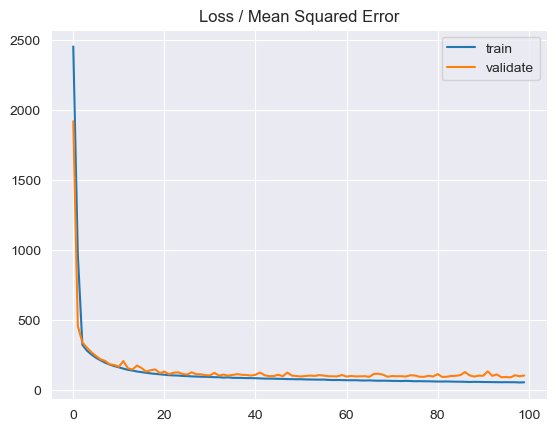

In [26]:
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validate')
plt.legend()
plt.show()

In [27]:
y_result = model.predict(X_val_scaled)
print("Validation Performance\n")
ANN_train = model_performance_regression(X_val_scaled,y_val, y_result)
ANN_train

11/11 [==============================] - 0s 1000us/step
Validation Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,10.220361,7.930508,0.708631,0.693666


In [28]:
y_test_result = model.predict(X_test_scaled)
ANN_test = model_performance_regression(X_test_scaled, y_test, y_test_result)
print("Test set Performance\n")
ANN_test

7/7 [==============================] - 0s 1ms/step
Test set Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,12.414396,9.457191,0.561793,0.519466


* Try Adam

In [29]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [30]:
model_adam = Sequential()
model_adam.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(17,)))

model_adam.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))

model_adam.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))

model_adam.add(Dense(1, activation='linear'))

model_adam.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4321 (16.88 KB)
Trainable params: 4321 (16.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
optimizer = Adam( learning_rate=0.001)
model_adam.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae'])
history_adam = model_adam.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100)

Epoch 1/100
44/44 [==============================] - 1s 4ms/step - loss: 2694.6772 - mae: 48.7171 - val_loss: 2405.6011 - val_mae: 45.2656
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: 1299.6694 - mae: 30.6392 - val_loss: 450.2619 - val_mae: 16.9705
Epoch 3/100
44/44 [==============================] - 0s 2ms/step - loss: 326.3374 - mae: 14.4243 - val_loss: 348.6657 - val_mae: 14.8983
Epoch 4/100
44/44 [==============================] - 0s 2ms/step - loss: 285.5167 - mae: 13.4417 - val_loss: 311.1585 - val_mae: 14.0458
Epoch 5/100
44/44 [==============================] - 0s 2ms/step - loss: 261.2768 - mae: 12.8574 - val_loss: 280.2374 - val_mae: 13.4154
Epoch 6/100
44/44 [==============================] - 0s 2ms/step - loss: 242.5847 - mae: 12.3871 - val_loss: 262.1513 - val_mae: 12.8478
Epoch 7/100
44/44 [==============================] - 0s 2ms/step - loss: 225.5672 - mae: 11.9659 - val_loss: 241.3398 - val_mae: 12.3286
Epoch 8/100
44/44 [===================

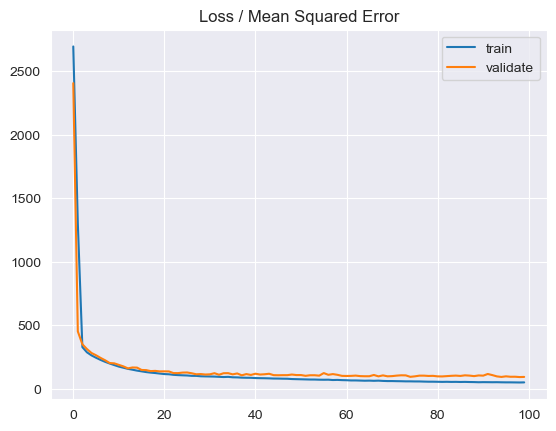

In [32]:
plt.title('Loss / Mean Squared Error')
plt.plot(history_adam.history['loss'], label='train')
plt.plot(history_adam.history['val_loss'], label='validate')
plt.legend()
plt.show()

In [33]:
y_result_adam = model_adam.predict(X_val_scaled)
print("Validation Performance\n")
ANN_train_adam = model_performance_regression(X_val_scaled,y_val, y_result_adam)
ANN_train_adam

11/11 [==============================] - 0s 1ms/step
Validation Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,9.573125,7.124484,0.744366,0.731237


In [34]:
y_result_adam_test = model_adam.predict(X_test_scaled)
print("Validation Performance\n")
ANN_test_adam = model_performance_regression(X_test_scaled,y_test, y_result_adam_test)
ANN_test_adam

7/7 [==============================] - 0s 921us/step
Validation Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,13.734005,10.760627,0.463681,0.411878


* Try SGD

In [35]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [36]:
model_sgd = Sequential()
model_sgd.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(17,)))

model_sgd.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))

model_sgd.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))

model_sgd.add(Dense(1, activation='linear'))

model_sgd.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4321 (16.88 KB)
Trainable params: 4321 (16.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
optimizer = SGD( learning_rate=0.001)
model_sgd.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae'])
history_sgd = model_sgd.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100)

Epoch 1/100
44/44 [==============================] - 0s 4ms/step - loss: 1081.6055 - mae: 26.9737 - val_loss: 254.7174 - val_mae: 13.0221
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: 406.8262 - mae: 15.7500 - val_loss: 258.2202 - val_mae: 12.8612
Epoch 3/100
44/44 [==============================] - 0s 2ms/step - loss: 217.5409 - mae: 11.7580 - val_loss: 180.5993 - val_mae: 10.8376
Epoch 4/100
44/44 [==============================] - 0s 2ms/step - loss: 185.1190 - mae: 10.7175 - val_loss: 340.3510 - val_mae: 14.9027
Epoch 5/100
44/44 [==============================] - 0s 2ms/step - loss: 199.9686 - mae: 11.2453 - val_loss: 150.4613 - val_mae: 9.5320
Epoch 6/100
44/44 [==============================] - 0s 2ms/step - loss: 164.5262 - mae: 10.0879 - val_loss: 151.9717 - val_mae: 9.9514
Epoch 7/100
44/44 [==============================] - 0s 2ms/step - loss: 174.4670 - mae: 10.4800 - val_loss: 141.8557 - val_mae: 9.4126
Epoch 8/100
44/44 [========================

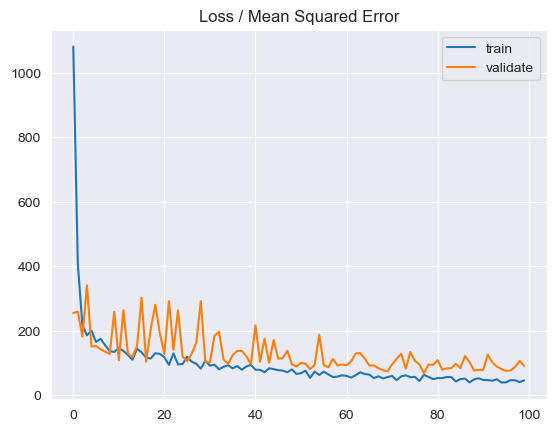

In [38]:
plt.title('Loss / Mean Squared Error')
plt.plot(history_sgd.history['loss'], label='train')
plt.plot(history_sgd.history['val_loss'], label='validate')
plt.legend()
plt.show()

In [39]:
y_result_sgd = model_sgd.predict(X_val_scaled)
print("Validation Performance\n")
ANN_train_sgd = model_performance_regression(X_val_scaled,y_val, y_result_sgd)
ANN_train_sgd

11/11 [==============================] - 0s 951us/step
Validation Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,9.49821,7.098654,0.748351,0.735427


In [40]:
y_result_sgd_test = model_sgd.predict(X_test_scaled)
print("Test Performance\n")
ANN_test_sgd = model_performance_regression(X_test_scaled,y_test, y_result_sgd_test)
ANN_test_sgd

7/7 [==============================] - 0s 1ms/step
Test Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,10.797722,8.234684,0.668493,0.636472


## Short summary

In [41]:
models_train_comp_df = pd.concat(
    [
        ANN_train.T,
        ANN_train_adam.T,
        ANN_train_sgd.T,
        ],
    axis=1,
)

models_train_comp_df.columns = [
    'RMSprop',
    'Adam',
    'SGD'
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,RMSprop,Adam,SGD
RMSE,10.220361,9.573125,9.498210
MAE,7.930508,7.124484,7.098654
R-squared,0.708631,0.744366,0.748351
Adj. R-squared,0.693666,0.731237,0.735427


In [42]:
models_train_comp_df = pd.concat(
    [
        ANN_test.T,
        ANN_test_adam.T,
        ANN_test_sgd.T,
    ],
    axis=1,
)

models_train_comp_df.columns = [
    'RMSprop',
    'Adam',
    'SGD'
]

print("Testing performance comparison:")
models_train_comp_df

Testing performance comparison:


,RMSprop,Adam,SGD
RMSE,12.414396,13.734005,10.797722
MAE,9.457191,10.760627,8.234684
R-squared,0.561793,0.463681,0.668493
Adj. R-squared,0.519466,0.411878,0.636472


# Model 2 (Early Stopping)

In [43]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [44]:
# Initializing the model
model_ES = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model_ES.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(17,)))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_ES.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_ES.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model_ES.add(Dense(1, activation='linear'))

model_ES.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4321 (16.88 KB)
Trainable params: 4321 (16.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
# Initializing the Optimizer
optimizer = SGD(0.001)
# Compiling the model with 'mse' as loss function and metrics
model_ES.compile(loss='mse',
                 optimizer=optimizer,
                 metrics=['mae'])
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
# Fitting the model on train and validation with 50 epochs
history_ES = model_ES.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100,callbacks=es_cb)

Epoch 1/100
44/44 [==============================] - 0s 4ms/step - loss: 1081.6055 - mae: 26.9737 - val_loss: 254.7174 - val_mae: 13.0221
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: 406.8262 - mae: 15.7500 - val_loss: 258.2202 - val_mae: 12.8612
Epoch 3/100
44/44 [==============================] - 0s 2ms/step - loss: 217.5409 - mae: 11.7580 - val_loss: 180.5993 - val_mae: 10.8376
Epoch 4/100
44/44 [==============================] - 0s 2ms/step - loss: 185.1190 - mae: 10.7175 - val_loss: 340.3510 - val_mae: 14.9027
Epoch 5/100
44/44 [==============================] - 0s 2ms/step - loss: 199.9686 - mae: 11.2453 - val_loss: 150.4613 - val_mae: 9.5320
Epoch 6/100
44/44 [==============================] - 0s 2ms/step - loss: 164.5262 - mae: 10.0879 - val_loss: 151.9717 - val_mae: 9.9514
Epoch 7/100
44/44 [==============================] - 0s 2ms/step - loss: 174.4670 - mae: 10.4800 - val_loss: 141.8557 - val_mae: 9.4126
Epoch 8/100
44/44 [========================

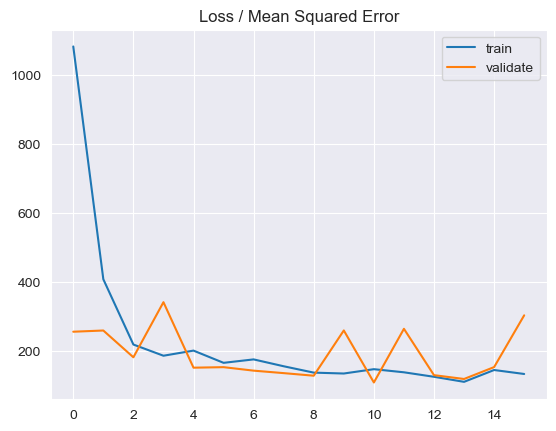

In [46]:
plt.title('Loss / Mean Squared Error')
plt.plot(history_ES.history['loss'], label='train')
plt.plot(history_ES.history['val_loss'], label='validate')
plt.legend()
plt.show()

In [47]:
y_result_ES = model_ES.predict(X_val_scaled)
print("Validation Performance\n")
ES_train = model_performance_regression(X_val_scaled,y_val, y_result_ES)
ES_train

11/11 [==============================] - 0s 751us/step
Validation Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,17.385303,14.559092,0.156906,0.113605


In [48]:
y_result_ES_test = model_ES.predict(X_test_scaled)
print("Test set Performance\n")
ES_test = model_performance_regression(X_test_scaled, y_test, y_result_ES_test)
ES_test

7/7 [==============================] - 0s 1ms/step
Test set Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,14.276386,11.221472,0.420485,0.364509


# Model 3 (Dropout with early stop)

In [49]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [50]:
model_DO = Sequential()
model_DO.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(17,)))
# Adding Dropout with 20%
model_DO.add(Dropout(0.2))
model_DO.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model_DO.add(Dropout(0.2))
model_DO.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model_DO.add(Dense(1, activation='linear'))

model_DO.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4321 (16.88 KB)
Trainable params: 4321 (16

In [51]:
optimizer = SGD(0.001)
model_DO.compile(loss='mse',
                 optimizer=optimizer,
                 metrics=['mae'])
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
history_DO = model_DO.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=50,callbacks=es_cb)

Epoch 1/50
44/44 [==============================] - 1s 4ms/step - loss: 1261.7031 - mae: 29.5001 - val_loss: 432.3002 - val_mae: 16.1490
Epoch 2/50
44/44 [==============================] - 0s 2ms/step - loss: 392.9119 - mae: 15.5968 - val_loss: 232.0234 - val_mae: 11.9767
Epoch 3/50
44/44 [==============================] - 0s 2ms/step - loss: 254.6646 - mae: 12.4454 - val_loss: 268.9045 - val_mae: 13.7854
Epoch 4/50
44/44 [==============================] - 0s 2ms/step - loss: 237.3505 - mae: 12.2530 - val_loss: 196.5462 - val_mae: 10.8781
Epoch 5/50
44/44 [==============================] - 0s 2ms/step - loss: 216.7040 - mae: 11.7427 - val_loss: 147.6884 - val_mae: 9.5498
Epoch 6/50
44/44 [==============================] - 0s 2ms/step - loss: 194.0294 - mae: 10.9451 - val_loss: 138.3762 - val_mae: 9.2885
Epoch 7/50
44/44 [==============================] - 0s 2ms/step - loss: 196.8045 - mae: 11.1347 - val_loss: 129.7175 - val_mae: 8.8378
Epoch 8/50
44/44 [==============================] 

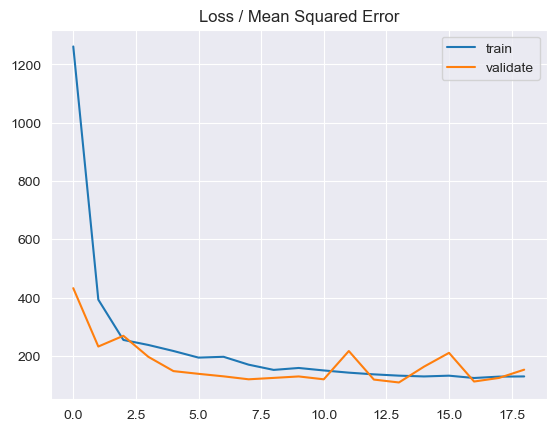

In [52]:
plt.title('Loss / Mean Squared Error')
plt.plot(history_DO.history['loss'], label='train')
plt.plot(history_DO.history['val_loss'], label='validate')
plt.legend()
plt.show()

In [53]:
y_result_DO = model_DO.predict(X_val_scaled)
print("Validation Performance\n")
DO_train = model_performance_regression(X_val_scaled,y_val, y_result_DO)
DO_train

11/11 [==============================] - 0s 1ms/step
Validation Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,12.353065,9.759576,0.574342,0.55248


In [54]:
y_result_DO_test = model_DO.predict(X_test_scaled)
print("Test set Performance\n")
DO_test = model_performance_regression(X_test_scaled,y_test, y_result_DO_test)
DO_test

7/7 [==============================] - 0s 1ms/step
Test set Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,10.849787,8.355517,0.665288,0.632958


# Model 4 (Batch Normalization)

In [55]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [56]:
model_BN = Sequential()
model_BN.add(Dense(64, activation='relu', kernel_initializer='he_uniform', input_shape=(17,)))
model_BN.add(BatchNormalization())
model_BN.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_BN.add(BatchNormalization())
model_BN.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_BN.add(BatchNormalization())
model_BN.add(Dense(1, activation='linear'))

model_BN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 batch_normalization_2 (Bat  (None, 32)                1

In [57]:
# Initializing the Optimizer
optimizer = SGD(0.001)
# Compiling the model with 'mse' as loss function and metrics
model_BN.compile(loss='mse',
                 optimizer=optimizer,
                 metrics=['mae'])
# Fitting the model on train and validation with 50 epochs
history_BN = model_BN.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100)

Epoch 1/100
44/44 [==============================] - 1s 8ms/step - loss: 1306.5129 - mae: 29.3138 - val_loss: 277.4156 - val_mae: 13.2322
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: 131.8510 - mae: 8.8385 - val_loss: 242.6529 - val_mae: 12.3506
Epoch 3/100
44/44 [==============================] - 0s 2ms/step - loss: 115.7971 - mae: 8.2522 - val_loss: 201.8602 - val_mae: 10.8996
Epoch 4/100
44/44 [==============================] - 0s 2ms/step - loss: 103.9362 - mae: 7.8269 - val_loss: 172.7747 - val_mae: 10.5968
Epoch 5/100
44/44 [==============================] - 0s 2ms/step - loss: 93.8079 - mae: 7.5563 - val_loss: 147.3224 - val_mae: 9.6184
Epoch 6/100
44/44 [==============================] - 0s 2ms/step - loss: 86.3215 - mae: 7.2103 - val_loss: 128.5532 - val_mae: 9.2294
Epoch 7/100
44/44 [==============================] - 0s 2ms/step - loss: 82.2036 - mae: 6.9304 - val_loss: 105.1291 - val_mae: 8.2010
Epoch 8/100
44/44 [==============================] -

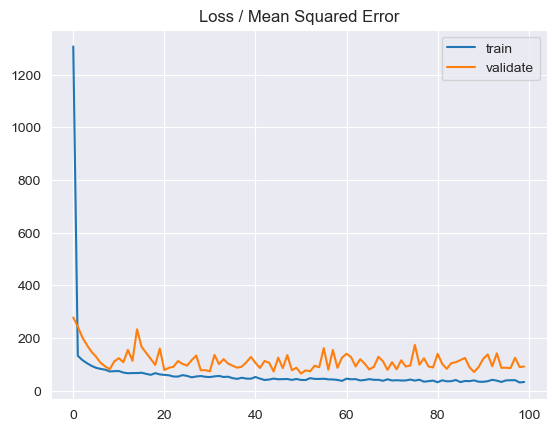

In [58]:
plt.title('Loss / Mean Squared Error')
plt.plot(history_BN.history['loss'], label='train')
plt.plot(history_BN.history['val_loss'], label='validate')
plt.legend()
plt.show()

In [59]:
y_result_BN = model_BN.predict(X_val_scaled)
print("Validation Performance\n")
BN_train = model_performance_regression(X_val_scaled,y_val, y_result_BN)
BN_train

11/11 [==============================] - 0s 1ms/step
Validation Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,9.551148,7.167295,0.745538,0.732469


In [60]:
y_result_BN_test = model_BN.predict(X_test_scaled)
print("Test set Performance\n")
BN_test = model_performance_regression(X_test_scaled,y_test, y_result_BN_test)
BN_test

7/7 [==============================] - 0s 1ms/step
Test set Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,11.112581,8.45384,0.648878,0.614963


# Model 5 (Model 3 with deeper layers)

In [61]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [62]:
model_Final = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model_Final.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(17,)))
# Adding dropout with ratio of 0.2
model_Final.add(Dropout(0.2))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_Final.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding dropout with ratio of 0.2
model_Final.add(Dropout(0.2))
# Adding the second hidden layer with 16 neurons, relu as activation function and, he_uniform as weight initializer
model_Final.add(Dense(16, activation='relu',kernel_initializer='he_uniform'))
# Adding the third hidden layer with 8 neurons, relu as activation function and, he_uniform as weight initializer
model_Final.add(Dense(8, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model_Final.add(Dense(1, activation='linear'))

model_Final.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9

In [63]:
# Initializing the Optimizer
optimizer = RMSprop(0.001)
# Compiling the model with 'mse' as loss function and metrics
model_Final.compile(loss='mse',
                    optimizer=optimizer,
                    metrics=['mae'])
# Adding the callbacks
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
# Fitting the model on train and validation with 50 epochs
history_Final = model_Final.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100,callbacks=es_cb)

Epoch 1/100
44/44 [==============================] - 1s 4ms/step - loss: 2772.6267 - mae: 49.5048 - val_loss: 2669.7854 - val_mae: 48.0276
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: 1882.1085 - mae: 38.9944 - val_loss: 1209.5817 - val_mae: 29.2762
Epoch 3/100
44/44 [==============================] - 0s 2ms/step - loss: 596.1812 - mae: 19.3437 - val_loss: 412.8122 - val_mae: 16.2518
Epoch 4/100
44/44 [==============================] - 0s 2ms/step - loss: 420.0487 - mae: 16.1721 - val_loss: 362.2523 - val_mae: 15.2159
Epoch 5/100
44/44 [==============================] - 0s 2ms/step - loss: 369.7861 - mae: 15.2164 - val_loss: 327.5048 - val_mae: 14.3700
Epoch 6/100
44/44 [==============================] - 0s 2ms/step - loss: 367.5009 - mae: 15.1557 - val_loss: 313.9339 - val_mae: 13.9016
Epoch 7/100
44/44 [==============================] - 0s 2ms/step - loss: 312.4522 - mae: 13.9813 - val_loss: 274.5413 - val_mae: 13.0820
Epoch 8/100
44/44 [==================

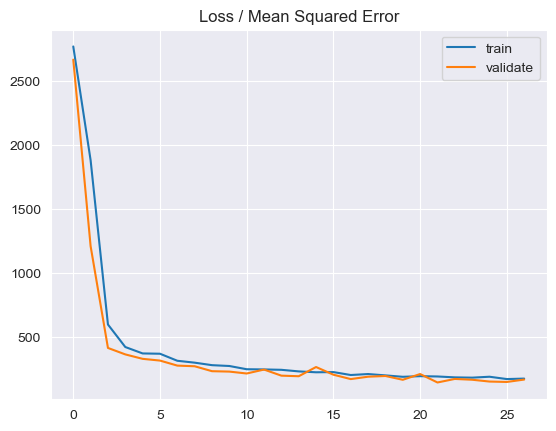

In [64]:
plt.title('Loss / Mean Squared Error')
plt.plot(history_Final.history['loss'], label='train')
plt.plot(history_Final.history['val_loss'], label='validate')
plt.legend()
plt.show()

In [65]:
y_result_final = model_Final.predict(X_val_scaled)
print("Validation Performance\n")
final_train = model_performance_regression(X_val_scaled,y_val, y_result_final)
final_train

11/11 [==============================] - 0s 1ms/step
Validation Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,12.858187,10.036115,0.53882,0.515134


In [66]:
y_result_final_test = model_Final.predict(X_test_scaled)
print("Validation Performance\n")
final_test = model_performance_regression(X_test_scaled,y_test, y_result_final_test)
final_test

7/7 [==============================] - 0s 1ms/step
Validation Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,11.660116,9.072458,0.613425,0.576085


* Try Adam

In [67]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [68]:
model_Final_adam = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model_Final_adam.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(17,)))
# Adding dropout with ratio of 0.2
model_Final_adam.add(Dropout(0.2))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_Final_adam.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding dropout with ratio of 0.2
model_Final_adam.add(Dropout(0.2))
# Adding the second hidden layer with 16 neurons, relu as activation function and, he_uniform as weight initializer
model_Final_adam.add(Dense(16, activation='relu',kernel_initializer='he_uniform'))
# Adding the third hidden layer with 8 neurons, relu as activation function and, he_uniform as weight initializer
model_Final_adam.add(Dense(8, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model_Final_adam.add(Dense(1, activation='linear'))

model_Final_adam.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9

In [69]:
# Initializing the Optimizer
optimizer = Adam(0.001)
# Compiling the model with 'mse' as loss function and metrics
model_Final_adam.compile(loss='mse',
                    optimizer=optimizer,
                    metrics=['mae'])
# Adding the callbacks
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
# Fitting the model on train and validation with 50 epochs
history_Final_adam = model_Final_adam.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100,callbacks=es_cb)

Epoch 1/100
44/44 [==============================] - 1s 5ms/step - loss: 2865.6658 - mae: 50.4558 - val_loss: 2853.0298 - val_mae: 49.9291
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: 2169.0518 - mae: 42.6048 - val_loss: 1383.7037 - val_mae: 31.9261
Epoch 3/100
44/44 [==============================] - 0s 2ms/step - loss: 585.3307 - mae: 19.3191 - val_loss: 410.6964 - val_mae: 16.1363
Epoch 4/100
44/44 [==============================] - 0s 2ms/step - loss: 416.7723 - mae: 16.0796 - val_loss: 358.6664 - val_mae: 14.9961
Epoch 5/100
44/44 [==============================] - 0s 2ms/step - loss: 367.3485 - mae: 15.1752 - val_loss: 312.5489 - val_mae: 14.1130
Epoch 6/100
44/44 [==============================] - 0s 2ms/step - loss: 364.6774 - mae: 15.0486 - val_loss: 306.6911 - val_mae: 13.7274
Epoch 7/100
44/44 [==============================] - 0s 2ms/step - loss: 307.6023 - mae: 13.8881 - val_loss: 278.6072 - val_mae: 13.1165
Epoch 8/100
44/44 [==================

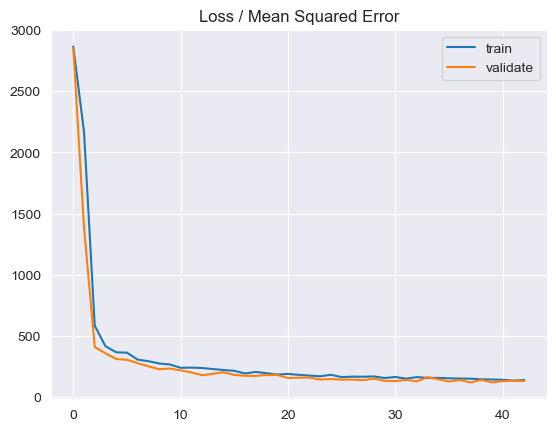

In [70]:
plt.title('Loss / Mean Squared Error')
plt.plot(history_Final_adam.history['loss'], label='train')
plt.plot(history_Final_adam.history['val_loss'], label='validate')
plt.legend()
plt.show()

In [71]:
y_result_final_adam = model_Final_adam.predict(X_val_scaled)
print("Validation Performance\n")
final_train_adam = model_performance_regression(X_val_scaled,y_val, y_result_final_adam)
final_train_adam

11/11 [==============================] - 0s 1ms/step
Validation Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,11.515953,9.029235,0.630077,0.611078


In [72]:
y_result_final_adam_test = model_Final_adam.predict(X_test_scaled)
print("Test set Performance\n")
final_test_adam = model_performance_regression(X_test_scaled,y_test, y_result_final_adam_test)
final_test_adam

7/7 [==============================] - 0s 1ms/step
Test set Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,11.248682,8.634392,0.640224,0.605473


* Try SGD

In [73]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [74]:
model_Final_sgd = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model_Final_sgd.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(17,)))
# Adding dropout with ratio of 0.2
model_Final_sgd.add(Dropout(0.2))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_Final_sgd.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding dropout with ratio of 0.2
model_Final_sgd.add(Dropout(0.2))
# Adding the second hidden layer with 16 neurons, relu as activation function and, he_uniform as weight initializer
model_Final_sgd.add(Dense(16, activation='relu',kernel_initializer='he_uniform'))
# Adding the third hidden layer with 8 neurons, relu as activation function and, he_uniform as weight initializer
model_Final_sgd.add(Dense(8, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model_Final_sgd.add(Dense(1, activation='linear'))

model_Final_sgd.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9

In [75]:
# Initializing the Optimizer
optimizer = SGD(0.001)
# Compiling the model with 'mse' as loss function and metrics
model_Final_sgd.compile(loss='mse',
                    optimizer=optimizer,
                    metrics=['mae'])
# Adding the callbacks
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
# Fitting the model on train and validation with 50 epochs
history_Final_sgd = model_Final_sgd.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=300,callbacks=es_cb)

Epoch 1/300
44/44 [==============================] - 1s 4ms/step - loss: 2494.8008 - mae: 45.8672 - val_loss: 428.4495 - val_mae: 16.8197
Epoch 2/300
44/44 [==============================] - 0s 2ms/step - loss: 441.0272 - mae: 16.4899 - val_loss: 363.4308 - val_mae: 15.0094
Epoch 3/300
44/44 [==============================] - 0s 2ms/step - loss: 293.6526 - mae: 13.4909 - val_loss: 237.1232 - val_mae: 12.3555
Epoch 4/300
44/44 [==============================] - 0s 2ms/step - loss: 261.2545 - mae: 12.8397 - val_loss: 245.4316 - val_mae: 12.1494
Epoch 5/300
44/44 [==============================] - 0s 2ms/step - loss: 231.7130 - mae: 12.1332 - val_loss: 161.4153 - val_mae: 9.9081
Epoch 6/300
44/44 [==============================] - 0s 2ms/step - loss: 210.0773 - mae: 11.5368 - val_loss: 171.0694 - val_mae: 10.5411
Epoch 7/300
44/44 [==============================] - 0s 3ms/step - loss: 220.2348 - mae: 11.8456 - val_loss: 137.5995 - val_mae: 9.2378
Epoch 8/300
44/44 [=======================

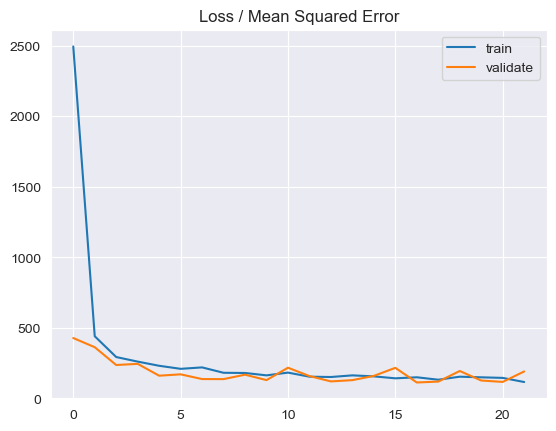

In [76]:
plt.title('Loss / Mean Squared Error')
plt.plot(history_Final_sgd.history['loss'], label='train')
plt.plot(history_Final_sgd.history['val_loss'], label='validate')
plt.legend()
plt.show()

In [77]:
y_result_final_sgd = model_Final_sgd.predict(X_val_scaled)
print("Validation Performance\n")
final_train_sgd = model_performance_regression(X_val_scaled,y_val, y_result_final_sgd)
final_train_sgd

11/11 [==============================] - 0s 1ms/step
Validation Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,13.834482,11.181119,0.466128,0.438709


In [78]:
y_result_final_sgd_test = model_Final_sgd.predict(X_test_scaled)
print("Test Performance\n")
final_test_sgd = model_performance_regression(X_test_scaled,y_test, y_result_final_sgd_test)
final_test_sgd

7/7 [==============================] - 0s 1ms/step
Test Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,17.015367,14.218208,0.176789,0.097275


# Overall summary

In [79]:
models_train_comp_df = pd.concat(
    [
        ANN_train_sgd.T,
        ES_train.T,
        DO_train.T,
        BN_train.T,
        final_train_adam.T
    ],
    axis=1,
)

models_train_comp_df.columns = [
    'ANN',
    'Early drop',
    'Dropout',
    'Batch Normalization',
    'Final adam'
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,ANN,Early drop,Dropout,Batch Normalization,Final adam
RMSE,9.498210,17.385303,12.353065,9.551148,11.515953
MAE,7.098654,14.559092,9.759576,7.167295,9.029235
R-squared,0.748351,0.156906,0.574342,0.745538,0.630077
Adj. R-squared,0.735427,0.113605,0.552480,0.732469,0.611078


In [80]:
models_test_comp_df = pd.concat(
    [
        ANN_test_sgd.T,
        ES_test.T,
        DO_test.T,
        BN_test.T,
        final_test_adam.T
    ],
    axis=1,
)

models_test_comp_df.columns = [
    'ANN',
    'Early drop',
    'Dropout',
    'Batch Normalization',
    'Final'
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,ANN,Early drop,Dropout,Batch Normalization,Final
RMSE,10.797722,14.276386,10.849787,11.112581,11.248682
MAE,8.234684,11.221472,8.355517,8.453840,8.634392
R-squared,0.668493,0.420485,0.665288,0.648878,0.640224
Adj. R-squared,0.636472,0.364509,0.632958,0.614963,0.605473


# Hyperparameter tuning with gridsearchcv

* The ANN model with SGD seems to be the best, yet it requires further fine tuning. 

In [79]:
%%time

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(64, 32, 32), (128, 64, 32), (64, 32, 16, 16)],
    'activation': ['relu', 'sigmoid', 'tanh'],
    'solver': ['adam', 'sgd', 'rmsprop'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'alpha': [0.0001, 0.001, 0.01],
    'early_stopping': [False, True],
    'validation_fraction': [0.1, 0.2, 0.3],
    'n_iter_no_change': [5, 10, 15]
}

# Create the GridSearchCV instance
grid_search = GridSearchCV(
    estimator=MLPRegressor(max_iter=100),
    param_grid=param_grid,
    scoring=make_scorer(mean_squared_error, greater_is_better=False),
    cv=5,
    verbose=1
)

# Fit the GridSearchCV instance to your data
grid_search_result = grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and the corresponding score
print("Best Parameters: ", grid_search_result.best_params_)
print("Best Score: ", grid_search_result.best_score_)

Fitting 5 folds for each of 4374 candidates, totalling 21870 fits
Best Parameters:  {'activation': 'relu', 'alpha': 0.001, 'early_stopping': False, 'hidden_layer_sizes': (128, 64, 32), 'learning_rate': 'adaptive', 'n_iter_no_change': 15, 'solver': 'sgd', 'validation_fraction': 0.3}
Best Score:  -62.80326695351405
CPU times: total: 8min 37s
Wall time: 1h 42min 27s


In [122]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [123]:
model_tune = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model_tune.add(Dense(128, activation='relu',kernel_initializer='he_uniform', input_shape=(17,)))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_tune.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_tune.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model_tune.add(Dense(1, activation='linear'))

model_tune.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2304      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12673 (49.50 KB)
Trainable params: 12673 (49.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [124]:
# Initializing the Optimizer
optimizer = SGD(0.001)
# Compiling the model with 'mse' as loss function and metrics
model_tune.compile(loss='mse',
                 optimizer=optimizer,
                 metrics=['mae'])
# Defining Early stopping

# Fitting the model on train and validation with 50 epochs
history_tune = model_tune.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=40)

Epoch 1/40
44/44 [==============================] - 0s 4ms/step - loss: 1340.7760 - mae: 29.7000 - val_loss: 917.5151 - val_mae: 25.5677
Epoch 2/40
44/44 [==============================] - 0s 2ms/step - loss: 360.8825 - mae: 15.2367 - val_loss: 189.6935 - val_mae: 10.9668
Epoch 3/40
44/44 [==============================] - 0s 2ms/step - loss: 264.9179 - mae: 12.9333 - val_loss: 250.8167 - val_mae: 13.2141
Epoch 4/40
44/44 [==============================] - 0s 2ms/step - loss: 230.3626 - mae: 12.1291 - val_loss: 374.6034 - val_mae: 15.6934
Epoch 5/40
44/44 [==============================] - 0s 2ms/step - loss: 234.0105 - mae: 11.9557 - val_loss: 148.6199 - val_mae: 9.6139
Epoch 6/40
44/44 [==============================] - 0s 2ms/step - loss: 157.4867 - mae: 9.8494 - val_loss: 165.2419 - val_mae: 10.4088
Epoch 7/40
44/44 [==============================] - 0s 2ms/step - loss: 187.8502 - mae: 10.7978 - val_loss: 169.6865 - val_mae: 10.3271
Epoch 8/40
44/44 [==============================]

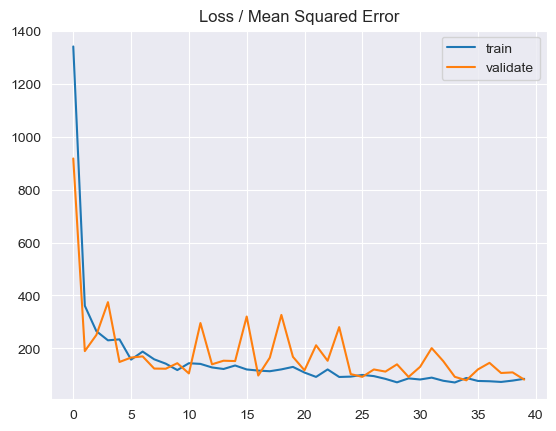

In [125]:
plt.title('Loss / Mean Squared Error')
plt.plot(history_tune.history['loss'], label='train')
plt.plot(history_tune.history['val_loss'], label='validate')
plt.legend()
plt.show()

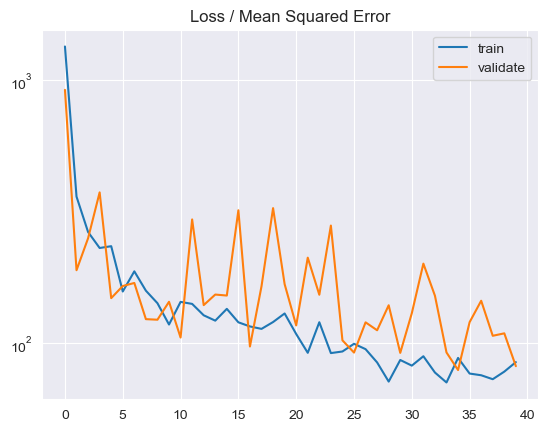

In [126]:
plt.title('Loss / Mean Squared Error')
plt.plot(history_tune.history['loss'], label='train')
plt.plot(history_tune.history['val_loss'], label='validate')
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.legend()
plt.show()

In [127]:
train_prediction = model_tune.predict(X_val_scaled)
print("Validation Performance\n")
Tune_train = model_performance_regression(X_val_scaled,y_val, train_prediction)
Tune_train

11/11 [==============================] - 0s 964us/step
Validation Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,9.054963,6.832415,0.77129,0.759544


In [128]:
test_prediction = model_tune.predict(X_test_scaled)
print("Testing Performance\n")
Tune_test = model_performance_regression(X_test_scaled,y_test, test_prediction)
Tune_test

7/7 [==============================] - 0s 2ms/step
Testing Performance


,RMSE,MAE,R-squared,Adj. R-squared
0,10.857531,8.148767,0.66481,0.632434


# Overall result

In [79]:
X_scaled = scaler.fit_transform(X)

In [80]:
y_pred = model_sgd.predict(X_scaled)
df_predictions = pd.DataFrame({'True Values': Y.values.flatten(), 'Predicted Values': y_pred.flatten()})
df_predictions

61/61 [==============================] - 0s 956us/step


,True Values,Predicted Values
0,75.930,73.889076
1,64.500,65.118088
2,49.230,53.815186
3,36.000,38.014969
4,62.800,64.104645
...,...,...
1932,42.350,52.475189
1933,38.236,43.790672
1934,46.827,52.599541
1935,47.069,47.741886


In [81]:
df_predictions['Difference'] = df_predictions['True Values'] - df_predictions['Predicted Values']
df_predictions

,True Values,Predicted Values,Difference
0,75.930,73.889076,2.040924
1,64.500,65.118088,-0.618088
2,49.230,53.815186,-4.585186
3,36.000,38.014969,-2.014969
4,62.800,64.104645,-1.304645
...,...,...,...
1932,42.350,52.475189,-10.125189
1933,38.236,43.790672,-5.554672
1934,46.827,52.599541,-5.772541
1935,47.069,47.741886,-0.672886


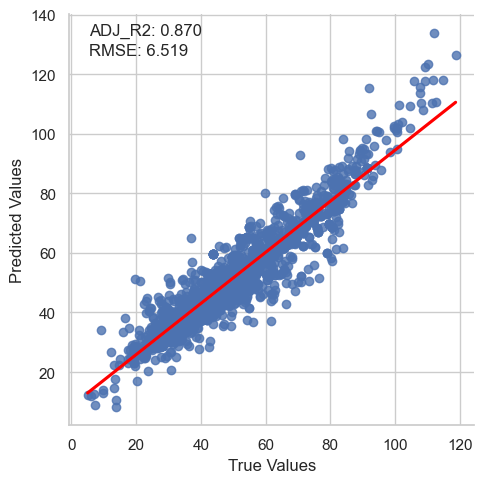

In [82]:
r2 = r2_score(df_predictions['True Values'], df_predictions['Predicted Values'])
adj_r2 = adj_r2_score(X_scaled, Y, y_pred)
rmse = mean_squared_error(df_predictions['True Values'], df_predictions['Predicted Values'], squared=False)

# Create the lmplot
sns.set(style="whitegrid")
lm_plot = sns.lmplot(data=df_predictions, x='True Values', y='Predicted Values', ci=True, line_kws={'color': 'red'})

# Annotate the plot with R2 and RMSE
plt.text(0.05, 0.95, f'ADJ_R2: {adj_r2:.3f}', transform=plt.gca().transAxes)
plt.text(0.05, 0.9, f'RMSE: {rmse:.3f}', transform=plt.gca().transAxes)

# Display the plot
plt.show()